# Deepelec V1 calculation/investigation

In [1]:
import datatoolbox as dt

In [14]:
import numpy as np  # Used for creating rating / indicator functions
import pyam  # Useful for storing climate / energy scenario data
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items


from pandas_indexing import *

import data_shepherd as ds
from data_shepherd.utils import convert_unit
import datatoolbox as dt

import pycountry

from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sns


ca_colors = ['#95AD28','#2C8090','#F0280E','#F0CF1C','#1478B0','#59C954','#059E73','#945EB0','#383836','#828282','#C2C2C2']
ca_colors = sns.color_palette(ca_colors)
ca_colors

from matplotlib import rcParams
# rcParams['font.sans-serif'] = ['Lato']

sns.set_palette(ca_colors)

## Import V2 data

In [38]:
df = pyam.IamDataFrame('../phaseI_1/REMIND_demRedConstrained_2024-07-09_15.42.55.xlsx')

pyam.core - INFO: Reading file ../phaseI_1/REMIND_demRedConstrained_2024-07-09_15.42.55.xlsx
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


In [52]:
df.filter(scenario = 'fab-Pk650-mktOff-NORTH-all', inplace=True)

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


In [9]:
ikea_phase2 = dt.findp(source='IKEA_phase2_downscaling').as_pyam()

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


In [10]:
ipcc_ar6 = dt.findp(
    source = 'IPCC_AR6_raw', 
    scenario = [
        'CEMICS_SSP1-1p5C-minCDR', 
        # 'SusDev_SSP1-PkBudg900',
        'DeepElec_SSP2_ HighRE_Budg900', 
        'NGFS2_Net-Zero 2050 - IPD-95th'
    ]).as_pyam()

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


## Small investigations

### Temperature

In [111]:
df.filter(variable = "*Globa*").variable

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
pyam.core - WARNING: Filtered IamDataFrame is empty!


[]

Text(0, 0.5, 'ºC')

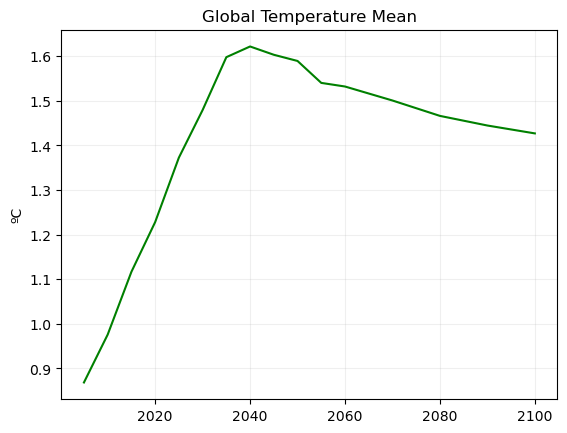

In [130]:
plt.plot(
    df.year, 
    [0.8683,0.9757,1.1165,1.228,1.3727,1.4794,1.598,1.622,1.6034,1.5895,1.5403,1.5322,1.5008,1.4663,1.4447,1.427], color = "green")
plt.title("Global Temperature Mean")
# plt.axhline(y = 1.5, color = 'r', linestyle = '--', alpha=0.5) 
plt.grid(alpha=0.2)
plt.ylabel("ºC")

In [112]:
[0.8683,0.9757,1.1165,1.228,1.3727,1.4794,1.598,1.622,1.6034,1.5895,1.5403,1.5322,1.5008,1.4663,1.4447,1.427]

[0.8683,
 0.9757,
 1.1165,
 1.228,
 1.3727,
 1.4794,
 1.598,
 1.622,
 1.6034,
 1.5895,
 1.5403,
 1.5322,
 1.5008,
 1.4663,
 1.4447,
 1.427]

### Emissions

In [29]:
df.filter(region = 'World', variable = 'Emissions|CO2', year = [2020,2025, 2030]).timeseries()

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


2020  \
model      scenario                   region variable      unit                      
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Emissions|CO2 Mt CO2/yr  44315.172052   

                                                                              2025  \
model      scenario                   region variable      unit                      
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Emissions|CO2 Mt CO2/yr  43613.408706   

                                                                              2030  
model      scenario                   region variable      unit                     
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Emissions|CO2 Mt CO2/yr  35442.021047

In [30]:
((44315.172052-35442.021047)/44315.172052)*100

20.02282873817601

In [27]:
((44315.172052-43613.408706)/44315.172052)*100

1.5835735561999882

In [25]:
df.filter(region = 'World', variable = 'Emissions|Kyoto Gases', year = [2020,2030, 2100]).timeseries()

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


2020  \
model      scenario                   region variable              unit                            
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Emissions|Kyoto Gases Mt CO2-equiv/yr  58562.112261   

                                                                                            2030  \
model      scenario                   region variable              unit                            
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Emissions|Kyoto Gases Mt CO2-equiv/yr  47544.354811   

                                                                                           2100  
model      scenario                   region variable              unit                          
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Emissions|Kyoto Gases Mt CO2-equiv/yr  3333.578505

In [24]:
((58562.112261-47544.354811)/58562.112261)*100

18.813797905540007

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


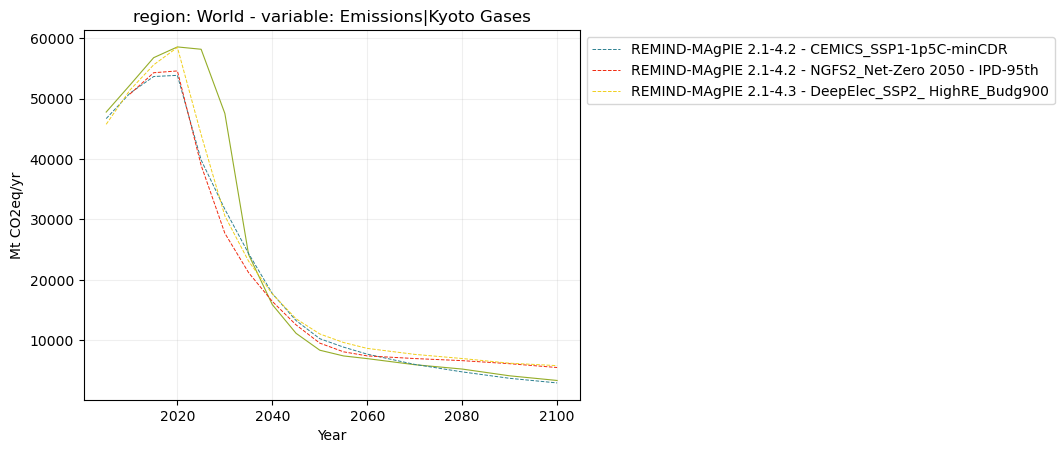

In [17]:
df.filter(variable = 'Emissions|Kyoto Gases', region = 'World').plot(linewidth = 0.8)
ipcc_ar6.filter(region='World', variable = 'Emissions|Kyoto Gases').plot(ax=plt.gca(), linestyle = '--', linewidth = 0.7)
plt.legend(bbox_to_anchor=(1,1))
plt.grid(alpha=0.2)

### Primary energy

In [58]:
df.filter(region = 'World', variable = 'Primary Energy|Coal', year = [2020,2030,2050]).timeseries()

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


2020  \
model      scenario                   region variable            unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Primary Energy|Coal EJ/yr  171.592595   

                                                                              2030  \
model      scenario                   region variable            unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Primary Energy|Coal EJ/yr  144.439539   

                                                                          2050  
model      scenario                   region variable            unit           
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Primary Energy|Coal EJ/yr  1.6687

In [56]:
# 2020-2030 change
print("for budget scenario :", ((171.604903	- 51.070759)/171.604903)*100)
# print("for original scenario :", ((171.604903	- 39.370794)/171.604903)*100)

for budget scenario : 70.23933576070375


In [57]:
# 2020-2030 change
print("for budget scenario :", ((171.604903	- 2.666890)/171.604903)*100)
# print("for original scenario :", ((172.371001	- 3.191576)/172.371001)*100)

for budget scenario : 98.4459127021563


/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


<Axes: title={'center': 'model: REMIND-MAgPIE 2.1-4.3 - scenario: DeepElec_SSP2_ HighRE_Budg900 - region: World - variable: Primary Energy|Oil'}, xlabel='Year', ylabel='EJ/yr'>

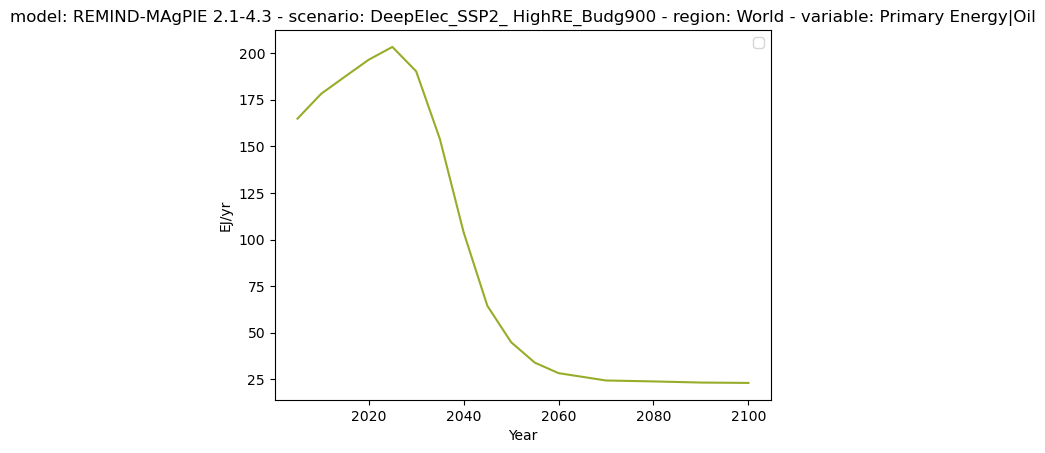

In [48]:
ipcc_ar6.filter(region = 'World', variable = 'Primary Energy|Oil', scenario = 'Deep*').plot()

In [53]:
df.filter(region = 'World', variable = 'Primary Energy|Oil', year = [2020,2030,2050]).timeseries()

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


2020  \
model      scenario                   region variable           unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Primary Energy|Oil EJ/yr  191.841905   

                                                                             2030  \
model      scenario                   region variable           unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Primary Energy|Oil EJ/yr  179.141632   

                                                                            2050  
model      scenario                   region variable           unit              
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Primary Energy|Oil EJ/yr  54.402547

In [59]:
# 2020-2030 change
print("for budget scenario :", ((191.841905	- 179.141632)/191.841905)*100)
# print("for original scenario :", ((190.630347	- 138.899832)/190.630347)*100)

for budget scenario : 6.620176650143257


In [60]:
# 2020-2030 change
print("for budget scenario :", ((191.841905	- 54.402547)/191.841905)*100)
# print("for original scenario :", ((190.630347	- 42.774144)/190.630347)*100)

for budget scenario : 71.6419897936272


In [61]:
df.filter(region = 'World', variable = 'Primary Energy|Gas', year = [2020,2030,2050]).timeseries()

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


2020  \
model      scenario                   region variable           unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Primary Energy|Gas EJ/yr  137.593436   

                                                                            2030  \
model      scenario                   region variable           unit               
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Primary Energy|Gas EJ/yr  133.92031   

                                                                            2050  
model      scenario                   region variable           unit              
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Primary Energy|Gas EJ/yr  17.104657

In [62]:
# 2020-2030 change
print("for budget scenario :", ((137.593436	- 133.92031	)/137.593436)*100)
# print("for original scenario :", ((134.581876	- 83.762732)/134.581876)*100)

for budget scenario : 2.6695503119785426


In [64]:
# 2020-2030 change
print("for budget scenario :", ((137.593436	- 17.104657)/137.593436)*100)
# print("for original scenario :", ((134.581876	- 11.637534)/134.581876)*100)

for budget scenario : 87.56869695440994


In [65]:
# df.filter(region x= 'World', variable = 'Primary Energy|Biomass', year = [2020,2030,2050]).timeseries()

In [66]:
# 2020-2030 change
# print("for budget scenario :", ((55.268406	- 77.157898)/55.268406)*100)
# print("for original scenario :", ((55.268406	- 73.565206)/55.268406)*100)

In [67]:
# 2020-2030 change
# print("for budget scenario :", ((55.268406	- 64.603117)/55.268406)*100)
# print("for original scenario :", ((55.268406 - 64.316723)/55.268406)*100)

### Secondary Energy

In [68]:
df.filter(variable = 'Capacity|Electricity|Solar', region = 'World').timeseries()

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


2005  \
model      scenario                   region variable                   unit             
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Capacity|Electricity|Solar GW    2.606396   

                                                                                   2010  \
model      scenario                   region variable                   unit              
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Capacity|Electricity|Solar GW    53.146269   

                                                                                   2015  \
model      scenario                   region variable                   unit              
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Capacity|Electricity|Solar GW    217.89825   

                                                                                    2020  \
model      scenario                   region variable                   unit               
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Capacity|Electricity|Solar GW    708.849391   

                                                                                    2025  \
model      scenario                   region variable                   unit               
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Capacity|Electricity|Solar GW    2011.53071   

                                                                                     2030  \
model      scenario                   region variable                   unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Capacity|Electricity|Solar GW    5622.587973   

                                                                                      2035  \
model      scenario                   region variable                   unit                 
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Capacity|Electricity|Solar GW    13461.470922   

                                                                                      2040  \
model      scenario                   region variable                   unit                 
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Capacity|Electricity|Solar GW    20495.910244   

                                                                                      2045  \
model      scenario                   region variable                   unit                 
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Capacity|Electricity|Solar GW    24976.518984   

                                                                                      2050  \
model      scenario                   region variable                   unit                 
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Capacity|Electricity|Solar GW    28159.959136   

                                                                                      2055  \
model      scenario                   region variable                   unit                 
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Capacity|Electricity|Solar GW    30620.815698   

                                                                                      2060  \
model      scenario                   region variable                   unit                 
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Capacity|Electricity|Solar GW    34459.318127   

                                                                                      2070  \
model      scenario                   region variable                   unit                 
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Capacity|Electricity|Solar GW    40096.310552   

                                                                                      2080  \
model      scenario                   region variable                   unit                 
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Capacity|Electricity|Solar GW    50865.129652   

                                                                                      2090  \
model      scenario                   region variable                  

In [69]:
ipcc_ar6.filter(region = 'World', variable = 'Secondary Energy|Electricity|Wind', scenario = 'Deep*').timeseries()

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


2005  \
model                 scenario                      region variable                          unit            
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  0.3929   

                                                                                                      2010  \
model                 scenario                      region variable                          unit            
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  2.1409   

                                                                                                      2015  \
model                 scenario                      region variable                          unit            
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  2.9966   

                                                                                                      2020  \
model                 scenario                      region variable                          unit            
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  5.3381   

                                                                                                       2025  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  13.3048   

                                                                                                       2030  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  29.3091   

                                                                                                       2035  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  47.4823   

                                                                                                       2040  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  62.1906   

                                                                                                       2045  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  76.0651   

                                                                                                       2050  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  85.2368   

                                                                                                       2055  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  92.5195   

                                                                                                       2060  \
model                 scenario                      region variable                          unit             
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Secondary Energy|Electricity|Wind EJ/yr  99.7803   

                                                                                                        20

In [70]:
print("2020-2030 for deepelec scenario :", ((5.3381	 - 29.3091)/5.3381)*100)
print("2020-2050 for deepelec scenario :", ((5.3381	 - 85.2368)/5.3381)*100)

2020-2030 for deepelec scenario : -449.05490717671086
2020-2050 for deepelec scenario : -1496.7628931642346


In [71]:
print("2020-2030 for deepelec scenario :", ((58.6165	 - 68.0115)/58.6165)*100)
print("2020-2050 for deepelec scenario :", ((58.6165	 - 98.1016)/58.6165)*100)

2020-2030 for deepelec scenario : -16.02791023005467
2020-2050 for deepelec scenario : -67.3617496779917


In [72]:
# 2020-2030 change
print("for deep scenario :", ((5.3381	- 29.3091)/5.3381)*100)

for deep scenario : -449.05490717671086


In [73]:
ipcc_ar6.filter(scenario = 'Deep*').divide(
    'Secondary Energy|Electricity|Coal', 
    'Secondary Energy|Electricity', 
    'Share|Secondary Energy|Electricity|Coal', 
    ignore_units=True
).filter(region = 'World').timeseries()

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: 

2005  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.399506   

                                                                                                                2010  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.381443   

                                                                                                                2015  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.375454   

                                                                                                                2020  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.367096   

                                                                                                                2025  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.192858   

                                                                                                                2030  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.022144   

                                                                                                                2035  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.000122   

                                                                                                                2040  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.000076   

                                                                                                                2045  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.000048   

                                                                                                                2050  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.000028   

                                                                                                                2055  \
model                 scenario                      region variable                                unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Coal unknown  0.000017   

                                                                                                                2060  \
model                

In [74]:
df.divide(
    'Secondary Energy|Electricity|Coal', 
    'Secondary Energy|Electricity', 
    'Share|Secondary Energy|Electricity|Coal', 
    ignore_units=True
).filter(region = 'World').timeseries()

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: 

2005  \
model      scenario                   region variable                                unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal unknown  0.399325   

                                                                                                  2010  \
model      scenario                   region variable                                unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal unknown  0.381772   

                                                                                                  2015  \
model      scenario                   region variable                                unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal unknown  0.372666   

                                                                                                  2020  \
model      scenario                   region variable                                unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal unknown  0.346485   

                                                                                                  2025  \
model      scenario                   region variable                                unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal unknown  0.294799   

                                                                                                 2030  \
model      scenario                   region variable                                unit               
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal unknown  0.18924   

                                                                                                  2035  \
model      scenario                   region variable                                unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal unknown  0.001086   

                                                                                                  2040  \
model      scenario                   region variable                                unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal unknown  0.000231   

                                                                                                  2045  \
model      scenario                   region variable                                unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal unknown  0.000182   

                                                                                                  2050  \
model      scenario                   region variable                                unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal unknown  0.000146   

                                                                                                  2055  \
model      scenario                   region variable                                unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal unknown  0.000113   

                                                                                                  2060  \
model      scenario                   region variable                                unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal unknown  0.000074   

                                                                                                  2070  \
model      scenario                   region variable                                unit                
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary 

In [75]:
ipcc_ar6.filter(scenario = 'Deep*').divide(
    'Secondary Energy|Electricity|Gas', 
    'Secondary Energy|Electricity', 
    'Share|Secondary Energy|Electricity|Gas', 
    ignore_units=True
).filter(region = 'World').timeseries()

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: 

2005  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.205468   

                                                                                                               2010  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.233437   

                                                                                                               2015  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.242367   

                                                                                                               2020  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.240924   

                                                                                                              2025  \
model                 scenario                      region variable                               unit               
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.20636   

                                                                                                               2030  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.115405   

                                                                                                               2035  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.055073   

                                                                                                               2040  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.039514   

                                                                                                               2045  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.022884   

                                                                                                               2050  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.014252   

                                                                                                               2055  \
model                 scenario                      region variable                               unit                
REMIND-MAgPIE 2.1-4.3 DeepElec_SSP2_ HighRE_Budg900 World  Share|Secondary Energy|Electricity|Gas unknown  0.007012   

                                                                                                               2060  \
model                 scenario                      regio

In [91]:
df.divide(
    'Secondary Energy|Electricity|Coal', 
    'Secondary Energy|Electricity', 
    'Share|Secondary Energy|Electricity|Coal', 
    ignore_units=True,
    append=True
)

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


In [92]:
df.divide(
    'Secondary Energy|Electricity|Gas', 
    'Secondary Energy|Electricity', 
    'Share|Secondary Energy|Electricity|Gas', 
    ignore_units=True,
    append=True
)

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


In [98]:
df.convert_unit("unknown", "%", factor=1e2, inplace=True)

In [99]:
df.filter(variable = 'Share|Secondary Energy|Electricity|Gas', region = 'World').timeseries()

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


2005  \
model      scenario                   region variable                               unit              
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Gas %     20.624031   

                                                                                               2010  \
model      scenario                   region variable                               unit              
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Gas %     24.104424   

                                                                                               2015  \
model      scenario                   region variable                               unit              
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Gas %     24.720568   

                                                                                               2020  \
model      scenario                   region variable                               unit              
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Gas %     24.344281   

                                                                                              2025  \
model      scenario                   region variable                               unit             
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Gas %     22.85006   

                                                                                               2030  \
model      scenario                   region variable                               unit              
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Gas %     17.315385   

                                                                                              2035  \
model      scenario                   region variable                               unit             
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Gas %     3.093606   

                                                                                              2040  \
model      scenario                   region variable                               unit             
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Gas %     0.666997   

                                                                                              2045  \
model      scenario                   region variable                               unit             
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Gas %     0.276825   

                                                                                              2050  \
model      scenario                   region variable                               unit             
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Gas %     0.145058   

                                                                                              2055  \
model      scenario                   region variable                               unit             
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Gas %     0.063436   

                                                                                              2060  \
model      scenario                   region variable                               unit             
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Gas %     0.010127   

                                                                                              2070  \
model      scenario                   region variable                               unit             
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Gas %     0.000017   

                                                                                         

In [100]:
df.filter(variable = 'Share|Secondary Energy|Electricity|Coal', region = 'World').timeseries()

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


2005  \
model      scenario                   region variable                                unit              
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal %     39.932468   

                                                                                                2010  \
model      scenario                   region variable                                unit              
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal %     38.177245   

                                                                                                2015  \
model      scenario                   region variable                                unit              
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal %     37.266649   

                                                                                                2020  \
model      scenario                   region variable                                unit              
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal %     34.648541   

                                                                                                2025  \
model      scenario                   region variable                                unit              
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal %     29.479867   

                                                                                                2030  \
model      scenario                   region variable                                unit              
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal %     18.924042   

                                                                                               2035  \
model      scenario                   region variable                                unit             
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal %     0.108571   

                                                                                               2040  \
model      scenario                   region variable                                unit             
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal %     0.023125   

                                                                                               2045  \
model      scenario                   region variable                                unit             
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal %     0.018202   

                                                                                               2050  \
model      scenario                   region variable                                unit             
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal %     0.014587   

                                                                                              2055  \
model      scenario                   region variable                                unit            
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal %     0.01129   

                                                                                               2060  \
model      scenario                   region variable                                unit             
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal %     0.007367   

                                                                                              2070  \
model      scenario                   region variable                                unit            
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Share|Secondary Energy|Electricity|Coal %     0.00029   

                                                      

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: 

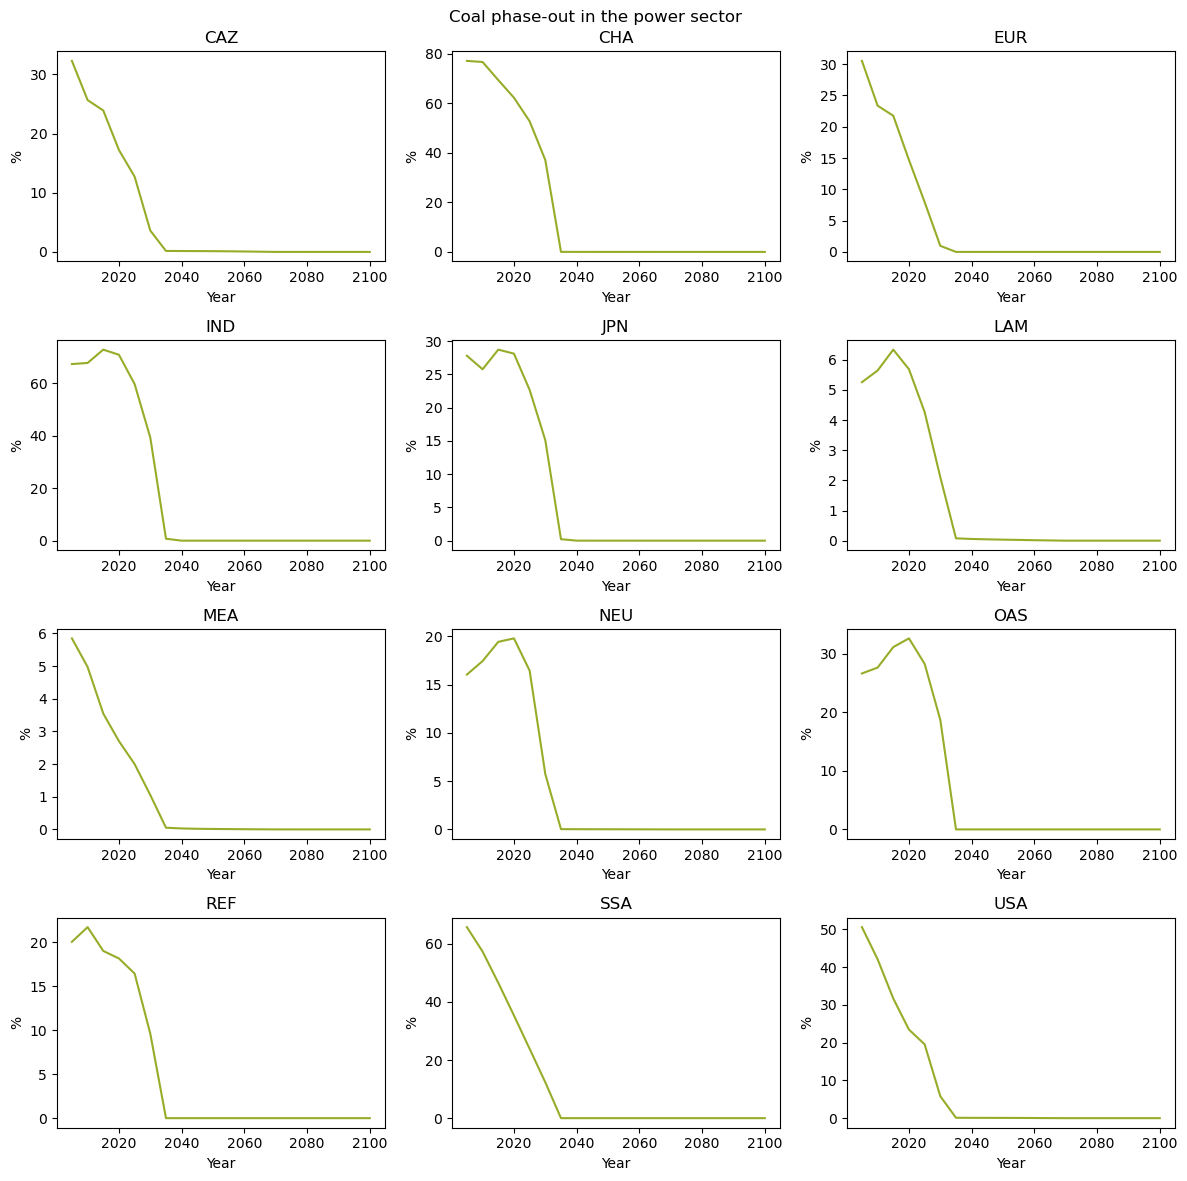

In [101]:
f, axes = plt.subplots(nrows=4,ncols=3,figsize=(12,12))

model_regions=['CAZ',
 'CHA',
 'EUR',
 'IND',
 'JPN',
 'LAM',
 'MEA',
 'NEU',
 'OAS',
 'REF',
 'SSA',
 'USA']

for count, ax in enumerate(axes.ravel()):
    df.filter(variable = "Share|Secondary Energy|Electricity|Coal", region=model_regions[count]).plot(ax=ax)
    ax.set_title(model_regions[count])
    ax.get_legend().remove()

# plt.legend()
# axes[0,0].legend(['Coal','Gas'])
plt.suptitle("Coal phase-out in the power sector")
plt.tight_layout()
plt.savefig("../outputs/V2_Coal_phaseout.png")

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: 

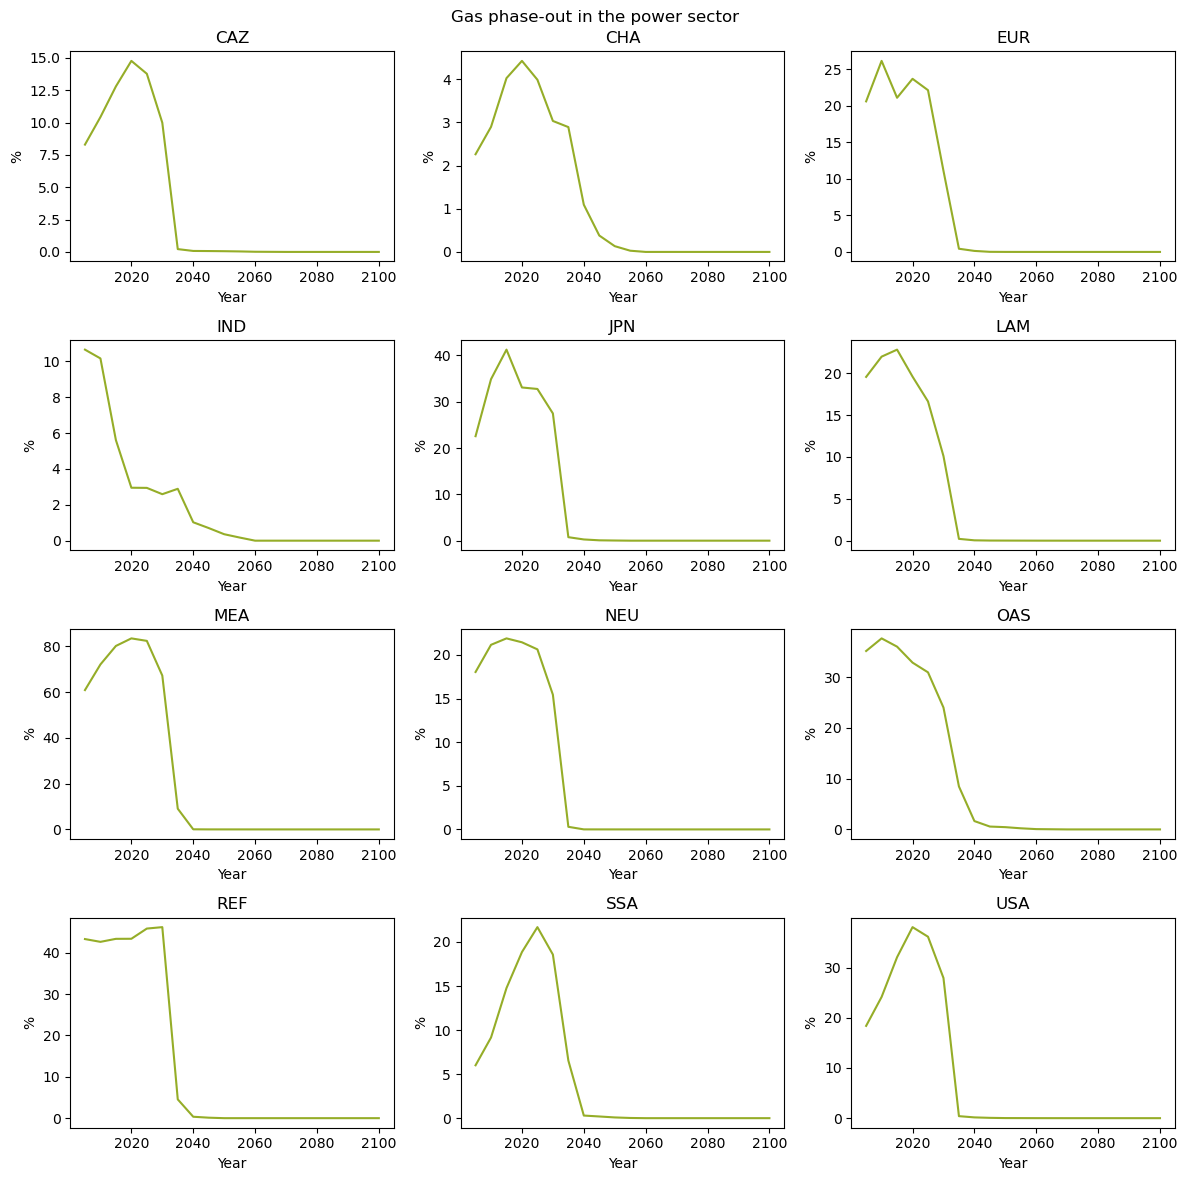

In [103]:
f, axes = plt.subplots(nrows=4,ncols=3,figsize=(12,12))

model_regions=['CAZ',
 'CHA',
 'EUR',
 'IND',
 'JPN',
 'LAM',
 'MEA',
 'NEU',
 'OAS',
 'REF',
 'SSA',
 'USA']

for count, ax in enumerate(axes.ravel()):
    df.filter(variable = "Share|Secondary Energy|Electricity|Gas", region=model_regions[count]).plot(ax=ax)
    ax.set_title(model_regions[count])
    ax.get_legend().remove()

# plt.legend()
# axes[0,0].legend(['Coal','Gas'])
plt.suptitle("Gas phase-out in the power sector")
plt.tight_layout()
plt.savefig("../outputs/V2_Gas_phaseout.png")

In [82]:
df.filter(variable = "Secondary Energy|Electricity|Coal", region = ['CAZ',
 'CHA',
 'EUR',
 'IND',
 'JPN',
 'LAM',
 'MEA',
 'NEU',
 'OAS',
 'REF',
 'SSA',
 'USA'])

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : REMIND 3.3 (1)
 * scenario : fab-Pk650-mktOff-NORTH-all (1)
Timeseries data coordinates:
   region   : CAZ, CHA, EUR, IND, JPN, LAM, MEA, NEU, OAS, REF, ... USA (12)
   variable : Secondary Energy|Electricity|Coal (1)
   unit     : EJ/yr (1)
   year     : 2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, ... 2100 (16)
Meta indicators:
   exclude (bool) False (1)

### Demand sectors

<Axes: title={'center': 'model: REMIND 3.3 scenario: SSP2EU-PkBudg500_cost_budget4_bionu region: World'}, xlabel='Year', ylabel='Mt CO2/yr'>

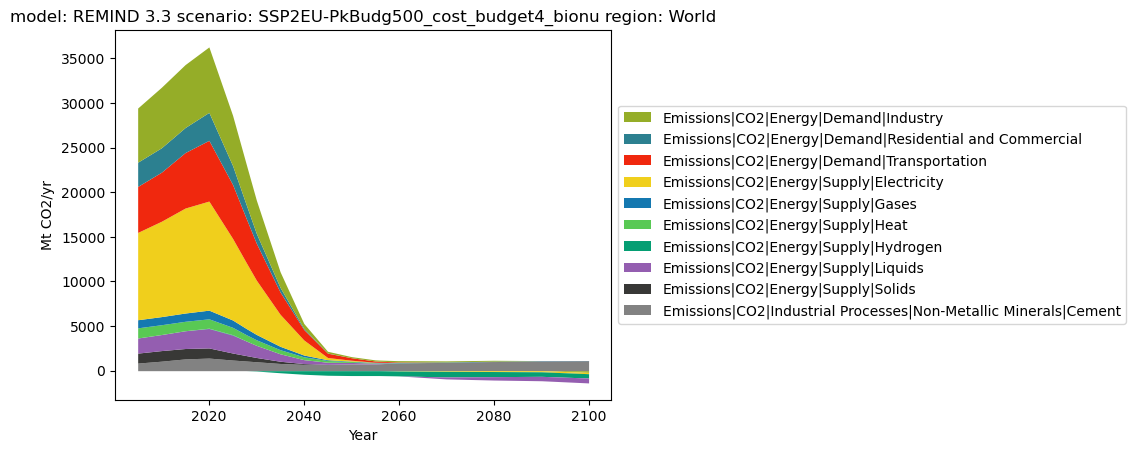

In [32]:
df.filter(variable = 'Emissions|CO2*', region = 'World', level = 3, scenario = '*budget*').filter(variable = ['*unkers*'], keep=False).plot.stack()

<Axes: title={'center': 'model: REMIND-MAgPIE 2.1-4.3 scenario: DeepElec_SSP2_ HighRE_Budg900 region: World'}, xlabel='Year', ylabel='Mt CO2/yr'>

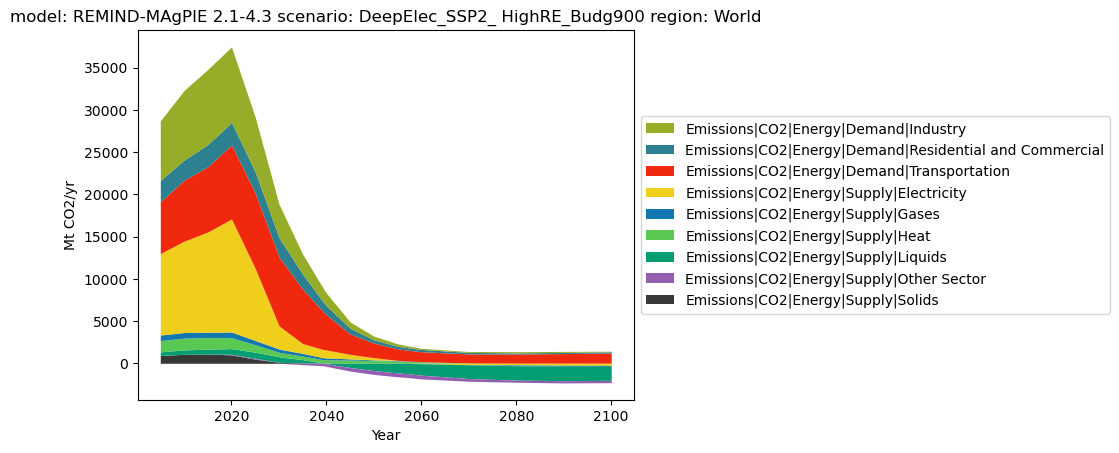

In [33]:
ipcc_ar6.filter(variable = 'Emissions|CO2*', region = 'World', level = 3, scenario = '*Deep*').plot.stack()

<Axes: title={'center': 'model: REMIND 3.3 scenario: SSP2EU-PkBudg500_cost_budget4_bionu region: World'}, xlabel='Year', ylabel='EJ/yr'>

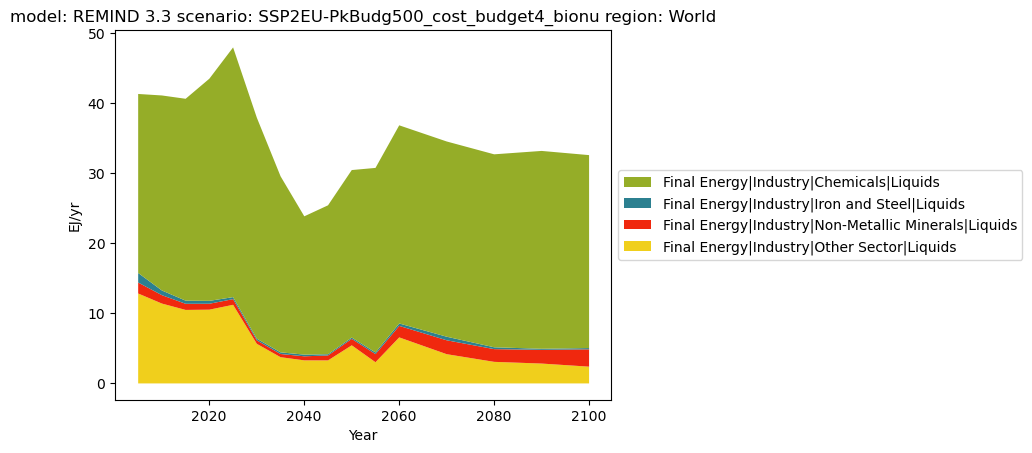

In [35]:
df.filter(region = 'World', variable = [
    'Final Energy|Industry|Chemicals|Liquids',
    'Final Energy|Industry|Iron and Steel|Liquids',
    'Final Energy|Industry|Non-Metallic Minerals|Liquids',
    'Final Energy|Industry|Other Sector|Liquids'], scenario = '*budge*').plot.stack()

<Axes: title={'center': 'model: REMIND 3.3 scenario: SSP2EU-PkBudg500_cost_year_bionu region: World'}, xlabel='Year', ylabel='EJ/yr'>

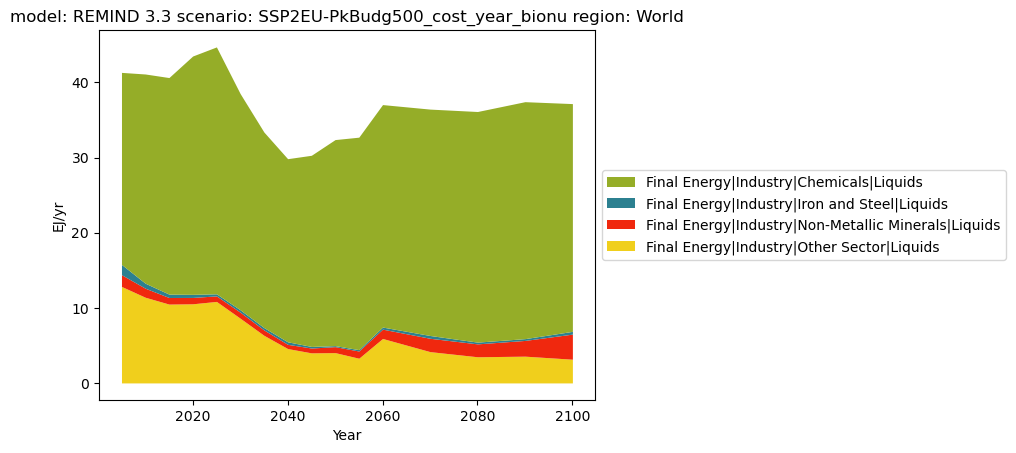

In [100]:
df.filter(region = 'World', variable = [
    'Final Energy|Industry|Chemicals|Liquids',
    'Final Energy|Industry|Iron and Steel|Liquids',
    'Final Energy|Industry|Non-Metallic Minerals|Liquids',
    'Final Energy|Industry|Other Sector|Liquids'], scenario = '*year*').plot.stack()

In [51]:
df.subtract('Primary Energy|Oil', 'Final Energy|Non-Energy Use|Solids', 'Primary Energy|Oil-FE|NE|Liquids',append=True)
df.subtract('Primary Energy|Oil', 'Final Energy|Non-Energy Use|Solids', 'Primary Energy|Oil-FE|NE|Solids',append=True)
df.subtract('Primary Energy|Gas', 'Final Energy|Non-Energy Use|Gases', 'Primary Energy|Oil-FE|NE|Gases',append=True)

<Axes: title={'center': 'model: REMIND 3.3 scenario: SSP2EU-PkBudg500_cost_budget4_bionu region: World'}, xlabel='Year', ylabel='EJ/yr'>

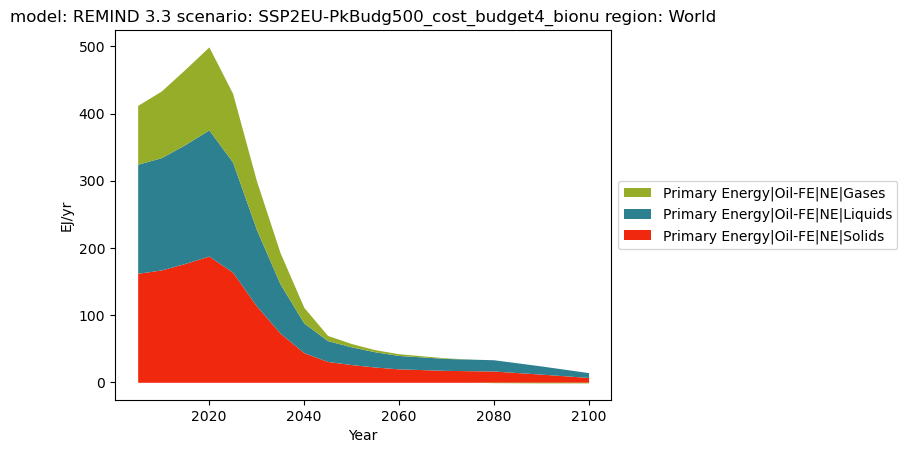

In [54]:
df.filter(variable = ['Primary Energy|Oil-FE|NE|Gases',
 'Primary Energy|Oil-FE|NE|Liquids',
 'Primary Energy|Oil-FE|NE|Solids'], region = 'World', scenario = '*budget*').plot.stack()

<Axes: title={'center': 'model: REMIND 3.3 scenario: SSP2EU-PkBudg500_cost_year_bionu region: World'}, xlabel='Year', ylabel='EJ/yr'>

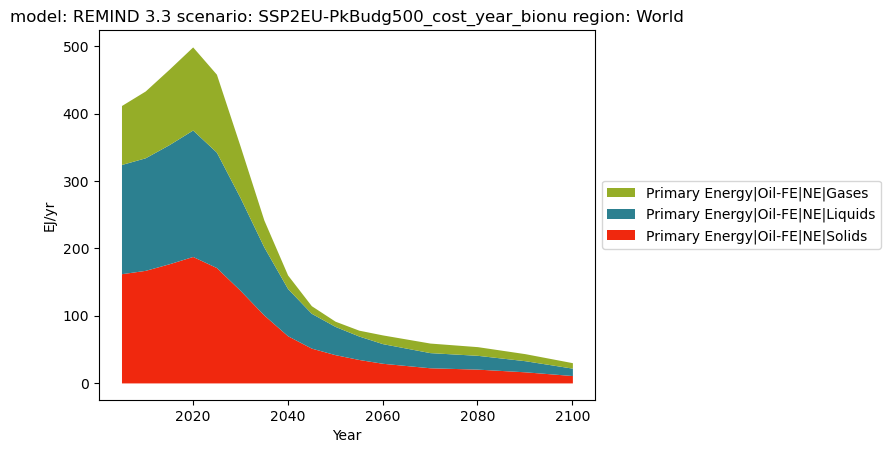

In [55]:
df.filter(variable = ['Primary Energy|Oil-FE|NE|Gases',
 'Primary Energy|Oil-FE|NE|Liquids',
 'Primary Energy|Oil-FE|NE|Solids'], region = 'World', scenario = '*year*').plot.stack()

In [24]:
df.divide(
    'Final Energy|Electricity', 
    'Final Energy', 
    'Share|Final Energy|Electricity',
    ignore_units=True
).filter(region = 'World').timeseries()

2005  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.159929   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.159929   

                                                                                                  2010  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.166158   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.166158   

                                                                                                  2015  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.180403   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.180403   

                                                                                                  2020  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.193944   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.193944   

                                                                                                  2025  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.236653   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.225048   

                                                                                                  2030  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.360383   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.318555   

                                                                                                  2035  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.498029   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.439323   

                                                                                                  2040  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.609612   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.558556   

                                                                                                  2045  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|Final Energy|Electricity unknown  0.660541   
           SSP2EU-PkBudg500_cost_year_bionu    World  Share|Final Energy|Electricity unknown  0.622435   

                                                                                                  2050  \
model      scenario                            region variable                       unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Share|F

In [23]:
df.filter(variable = ['Final Energy|Electricity', 'Final Energy'], region = 'World').timeseries()

2005  \
model      scenario                            region variable                 unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Final Energy             EJ/yr  343.531406   
                                                      Final Energy|Electricity EJ/yr   54.940669   
           SSP2EU-PkBudg500_cost_year_bionu    World  Final Energy             EJ/yr  343.531406   
                                                      Final Energy|Electricity EJ/yr   54.940669   

                                                                                            2010  \
model      scenario                            region variable                 unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Final Energy             EJ/yr  370.857278   
                                                      Final Energy|Electricity EJ/yr   61.620746   
           SSP2EU-PkBudg500_cost_year_bionu    World  Final Energy             EJ/yr  370.857278   
                                                      Final Energy|Electricity EJ/yr   61.620746   

                                                                                            2015  \
model      scenario                            region variable                 unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Final Energy             EJ/yr  401.360863   
                                                      Final Energy|Electricity EJ/yr   72.406523   
           SSP2EU-PkBudg500_cost_year_bionu    World  Final Energy             EJ/yr  401.360863   
                                                      Final Energy|Electricity EJ/yr   72.406523   

                                                                                            2020  \
model      scenario                            region variable                 unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Final Energy             EJ/yr  435.195121   
                                                      Final Energy|Electricity EJ/yr   84.403294   
           SSP2EU-PkBudg500_cost_year_bionu    World  Final Energy             EJ/yr  435.195121   
                                                      Final Energy|Electricity EJ/yr   84.403294   

                                                                                            2025  \
model      scenario                            region variable                 unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Final Energy             EJ/yr  400.216541   
                                                      Final Energy|Electricity EJ/yr   94.712258   
           SSP2EU-PkBudg500_cost_year_bionu    World  Final Energy             EJ/yr  415.788210   
                                                      Final Energy|Electricity EJ/yr   93.572155   

                                                                                            2030  \
model      scenario                            region variable                 unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Final Energy             EJ/yr  366.268221   
                                                      Final Energy|Electricity EJ/yr  131.996832   
           SSP2EU-PkBudg500_cost_year_bionu    World  Final Energy             EJ/yr  354.323079   
                                                      Final Energy|Electricity EJ/yr  112.871212   

                                                                                            2035  \
model      scenario                            region variable                 unit                
REMIND 3.3 SSP2EU-PkBudg500_cost_budget4_bionu World  Final Energy             EJ/yr  349.055916   
                                                      Final Energy|Electricity EJ/yr  173.839956   
           SSP2EU-PkBudg500_cost_year_bionu    World  Final Energy             EJ/yr  

### CCS

In [106]:
df.filter(variable = [
    'Carbon Capture|Storage|Biomass',
    'Carbon Capture|Storage|Direct Air Capture',
    'Carbon Removal|Land Use',
    'Carbon Capture|Industry'
], 
          region = 'World',
         )

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : REMIND 3.3 (1)
 * scenario : fab-Pk650-mktOff-NORTH-all (1)
Timeseries data coordinates:
   region   : World (1)
   variable : Carbon Capture|Industry, ... Carbon Removal|Land Use (4)
   unit     : Mt CO2/yr (1)
   year     : 2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, ... 2100 (16)
Meta indicators:
   exclude (bool) False (1)

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/plotting.py:466: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  pd.concat([_df, _rows.loc[_rows.index.difference(_df.index)]])
/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/plotting.py:485: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  _df_pos = _df.applymap(lambda x: max(x, 0))
/Users/

Text(0.5, 1.0, 'Default scenario')

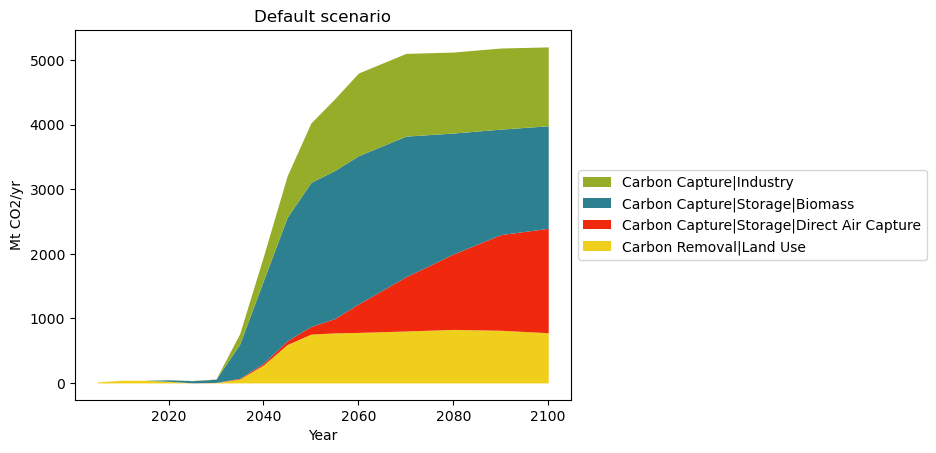

In [107]:
df.filter(variable = [
    'Carbon Capture|Storage|Biomass',
    'Carbon Capture|Storage|Direct Air Capture',
    'Carbon Removal|Land Use',
    'Carbon Capture|Industry'
], 
          region = 'World').plot.stack()
plt.title('Default scenario')

In [108]:
df.filter(variable = [
    'Carbon Capture|Biomass',
    'Carbon Capture|Direct Air Capture',
    'Carbon Removal|Land Use',
    'Carbon Capture|Industry'
], 
          region = 'World',
          year = [2030,2050,2100]
         ).timeseries()

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


2030  \
model      scenario                   region variable                          unit                   
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Carbon Capture|Biomass            Mt CO2/yr  77.758675   
                                             Carbon Capture|Direct Air Capture Mt CO2/yr   4.382139   
                                             Carbon Capture|Industry           Mt CO2/yr   4.598266   
                                             Carbon Removal|Land Use           Mt CO2/yr   6.196667   

                                                                                                 2050  \
model      scenario                   region variable                          unit                     
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Carbon Capture|Biomass            Mt CO2/yr  2876.940616   
                                             Carbon Capture|Direct Air Capture Mt CO2/yr   121.472214   
                                             Carbon Capture|Industry           Mt CO2/yr   920.321355   
                                             Carbon Removal|Land Use           Mt CO2/yr   756.470000   

                                                                                                 2100  
model      scenario                   region variable                          unit                    
REMIND 3.3 fab-Pk650-mktOff-NORTH-all World  Carbon Capture|Biomass            Mt CO2/yr  2868.883414  
                                             Carbon Capture|Direct Air Capture Mt CO2/yr  3726.765445  
                                             Carbon Capture|Industry           Mt CO2/yr  1221.408023  
                                             Carbon Removal|Land Use           Mt CO2/yr   777.883333

### LULUCF

In [137]:
df.filter(variable = ["*Land Use*", "*AFOLU*"]).variable

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


['Carbon Removal|Land Use',
 'Emissions|BC|AFOLU',
 'Emissions|CH4|AFOLU',
 'Emissions|CH4|AFOLU|Agriculture',
 'Emissions|CH4|AFOLU|Agriculture|Livestock',
 'Emissions|CH4|AFOLU|Agriculture|Livestock|Enteric Fermentation',
 'Emissions|CH4|AFOLU|Agriculture|Livestock|Manure Management',
 'Emissions|CH4|AFOLU|Agriculture|Rice',
 'Emissions|CH4|AFOLU|Land',
 'Emissions|CH4|AFOLU|Land|Wetlands',
 'Emissions|CO2|AFOLU',
 'Emissions|CO2|AFOLU|Land',
 'Emissions|CO|AFOLU',
 'Emissions|Kyoto Gases|AFOLU',
 'Emissions|Kyoto Gases|AFOLU|Agriculture',
 'Emissions|Kyoto Gases|AFOLU|Land',
 'Emissions|N2O|AFOLU',
 'Emissions|N2O|AFOLU|Agriculture',
 'Emissions|N2O|AFOLU|Agriculture|Livestock|Manure Management',
 'Emissions|N2O|AFOLU|Agriculture|Managed Soils',
 'Emissions|N2O|AFOLU|Land',
 'Emissions|N2O|AFOLU|Land|Wetlands',
 'Emissions|NH3|AFOLU',
 'Emissions|NOx|AFOLU',
 'Emissions|OC|AFOLU',
 'Emissions|Sulfur|AFOLU',
 'Emissions|VOC|AFOLU']

/Users/marie-charlottegeffray/opt/anaconda3/envs/ar6_downscaling_algo/lib/python3.11/site-packages/pyam/core.py:2614: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  index = pd.unique(index)


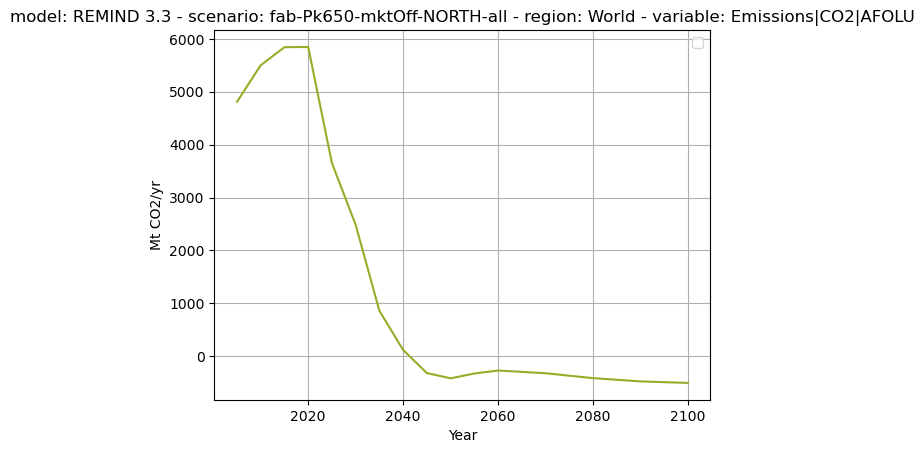

In [139]:
df.filter(variable = 'Emissions|CO2|AFOLU', region="World").plot()
plt.grid()